<a href="https://colab.research.google.com/github/tejasramramesh/Stroke-Prediction/blob/main/Code/Kaggle_Stroke_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn -U

In [ ]:
path_train = '/content/train.csv'
data_train = pd.read_csv(path_train)

In [ ]:
path_test = '/content/test.csv'
data_test = pd.read_csv(path_test)

##Data Description 

In [ ]:
data_train.shape

(15304, 12)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
data_train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


We do not need id for any reason so let us drop the OA.

In [ ]:
data_train.drop("id",axis = 1, inplace = True)
data_test.drop("id",axis = 1, inplace = True)

In [ ]:
data_train.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0


In [ ]:
data_train.shape

(15304, 11)

In [ ]:
data_test.shape

(10204, 10)

In [ ]:
data_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
data_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Test set does not have stroke

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10204 non-null  object 
 1   age                10204 non-null  float64
 2   hypertension       10204 non-null  int64  
 3   heart_disease      10204 non-null  int64  
 4   ever_married       10204 non-null  object 
 5   work_type          10204 non-null  object 
 6   Residence_type     10204 non-null  object 
 7   avg_glucose_level  10204 non-null  float64
 8   bmi                10204 non-null  float64
 9   smoking_status     10204 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 797.3+ KB


In [ ]:
data_test.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000
mean,41.920713,0.051450,0.021756,89.197766,28.242351
std,21.097956,0.220925,0.145894,25.914364,6.733863
min,0.080000,0.000000,0.000000,55.120000,11.500000
25%,26.000000,0.000000,0.000000,75.060000,23.700000
50%,43.500000,0.000000,0.000000,85.070000,27.700000
75%,57.000000,0.000000,0.000000,96.750000,32.000000
max,82.000000,1.000000,1.000000,267.600000,97.600000


###Data Null values 

Train Set:

In [ ]:
print("Null values counts in train set are: \n ")
print(data_train.isnull().sum())

Null values counts in train set are: 
 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Test Set

In [ ]:
print("Null values counts in Test set are: \n ")
print(data_test.isnull().sum())

Null values counts in Test set are: 
 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


Train value and percentage

In [ ]:
print('-----Train Classes-------')
display(pd.merge(
    data_train.stroke.value_counts().rename('count'),
    data_train.stroke.value_counts(True).rename('%').mul(100),
    left_index=True,
    right_index=True
))

print('0 is no stroke, 1 is stroke')

-----Train Classes-------


,count,%
0,14672,95.870361
1,632,4.129639


0 is no stroke, 1 is stroke


We are dealing with Class Imbalanced Data

###Target column

In [ ]:
target_column = 'stroke'

### Category wise column names

In [ ]:
train_columns = data_train.columns.to_list()

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


Lets store the columns according to their data type, this will make it easy for us to scale and encode the data.

In [ ]:
num_col = []
fl_col = [] 
cat_col = []
for col in train_columns:
  #print(col)
  if data_train[col].dtype == "int64":
    num_col.append(col)
  elif data_train[col].dtype == "float64": 
    fl_col.append(col)
  else:
    cat_col.append(col)

In [ ]:
print("----num_col----")
print(num_col)
print("----fl_col----")
print(fl_col)
print("----cat_col----")
print(cat_col)

----num_col----
['hypertension', 'heart_disease', 'stroke']
----fl_col----
['age', 'avg_glucose_level', 'bmi']
----cat_col----
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##Data Distribution

###Numerical

In [ ]:

kdeplot_hyperparams = {
    'alpha':1.0,
    'fill': True,
    'linewidth': 1.25, 
    'zorder': 2

}

sns.axes_style("darkgrid");

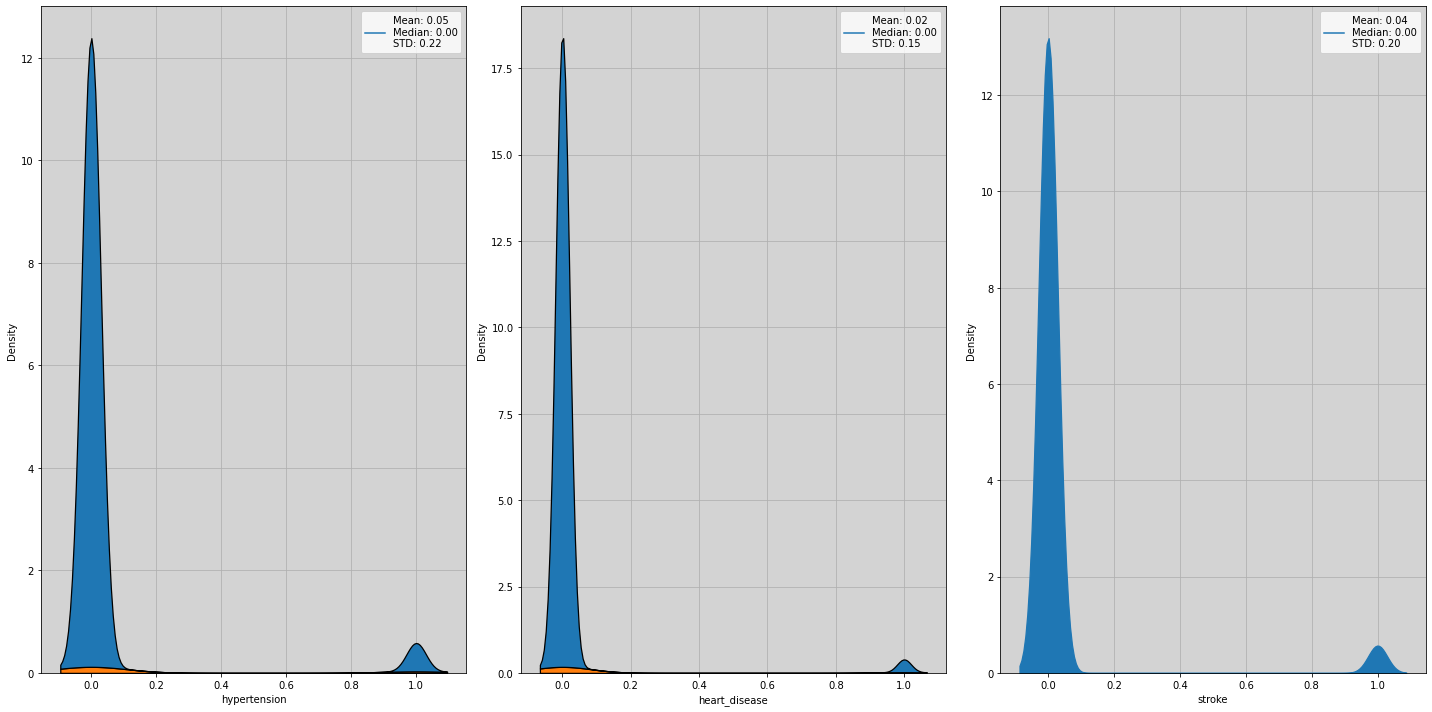

In [95]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(num_col):
  ax[i].grid(axis="both")
  ax[i].set_facecolor("lightgrey")
  if col != 'stroke':

    sns.kdeplot( data = data_train, x = col, hue = 'stroke', multiple = 'stack' ,ax=ax[i], **kdeplot_hyperparams )
  else:
    sns.kdeplot( data = data_train, x = col ,ax=ax[i], **kdeplot_hyperparams )

  #Display Stats 
  mean = np.mean(data_train[col])
  median = np.median(data_train[col])
  std = np.std(data_train[col])
  ax[i].plot([],[],label=f"Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std:.2f}")
  ax[i].legend()

plt.tight_layout()







**We named it num_col based on dtype but its infact categorical lets do cramers test on this.**

Should have found out this earlier itself. Its always better to know what kind of values is present in each of the column.

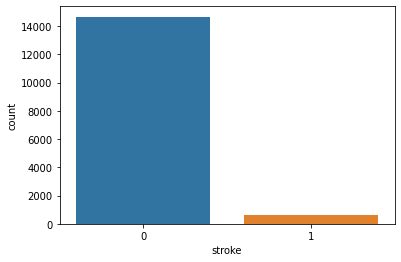

In [ ]:
sns.countplot(data=data_train, x = data_train['stroke'])

We need to handle class imbalance.



Link: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/


https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/


https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/

Read about Cohens kappa

The above graphs are bi-plots with nearly similar standard deviation. Lets check if they are correlated later.

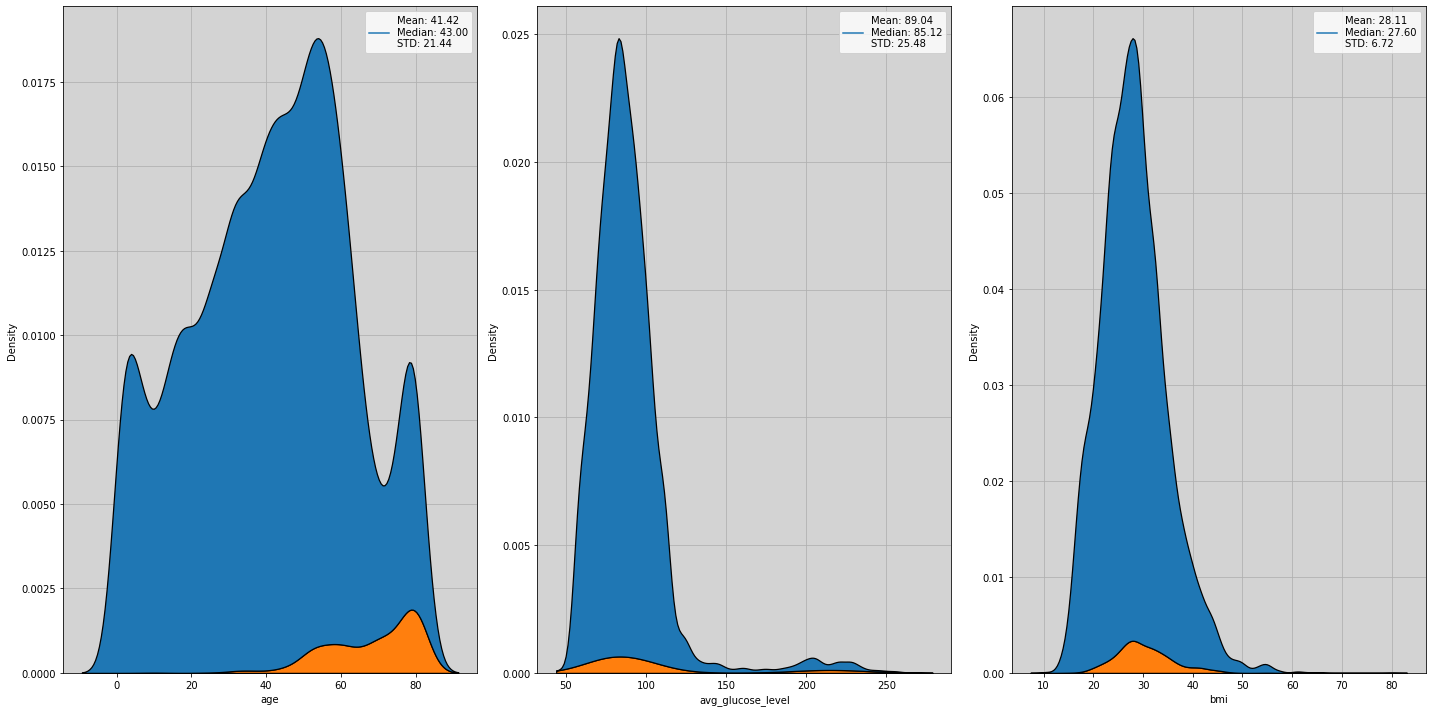

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(fl_col):
  ax[i].grid(axis="both")
  ax[i].set_facecolor("lightgrey")
  sns.kdeplot( data = data_train, x = col, hue = 'stroke', multiple = 'stack' ,ax=ax[i], **kdeplot_hyperparams )

  #Display Stats
  mean = np.mean(data_train[col])
  median = np.median(data_train[col])
  std = np.std(data_train[col])
  ax[i].plot([],[],label=f"Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std:.2f}")
  ax[i].legend()

  plt.tight_layout()

In [ ]:
data_train['age']

0        28.0
1        33.0
2        42.0
3        56.0
4        24.0
         ... 
15299    22.0
15300    46.0
15301    75.0
15302    46.0
15303    14.0
Name: age, Length: 15304, dtype: float64

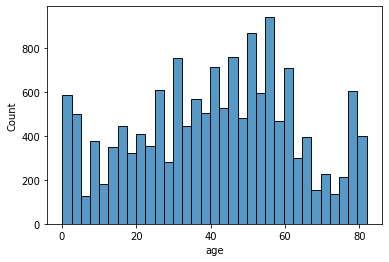

In [ ]:
sns.histplot(data_train,x=data_train['age'],)

**Age graph** is Right skewed with High standard deviation, Since mean is less than median we can say we have more data about the younger people ( age < median)


**Avg_glucose graph** is right skewed with high standard deviation, here the mean is higher than median hence we can say outlier are really big in value and we have quite a few outliers else mean wont be larger than median.


**Bmi** is also right skewed and the range of values seems to be small cause mean is not very different from median.

**Note:**
Also we can see that age and bmi seems to have some correlation with stroke. We can affirm this by using pearsons correlation.

####Note
*  Question is should we do log scale normalization on avg_glucose level ?  

Answer: 

If I use a logistic regression then yes, but I choose a non linear method then I feel scaling is sufficient.

In [ ]:
data_fl = data_train[fl_col]

print(data_fl.corr())

                        age  avg_glucose_level       bmi
age                1.000000           0.108897  0.390721
avg_glucose_level  0.108897           1.000000  0.108142
bmi                0.390721           0.108142  1.000000


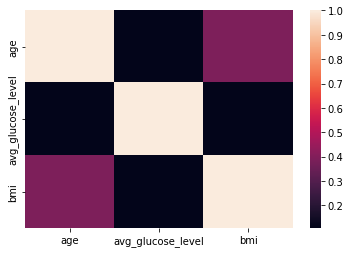

In [ ]:
sns.heatmap(data_fl.corr())

Data seems to be linearly seperable and independent. We do not seem to be facing multicolinearity.



Lets look at feature engineering, if we require it.

###Linearity check

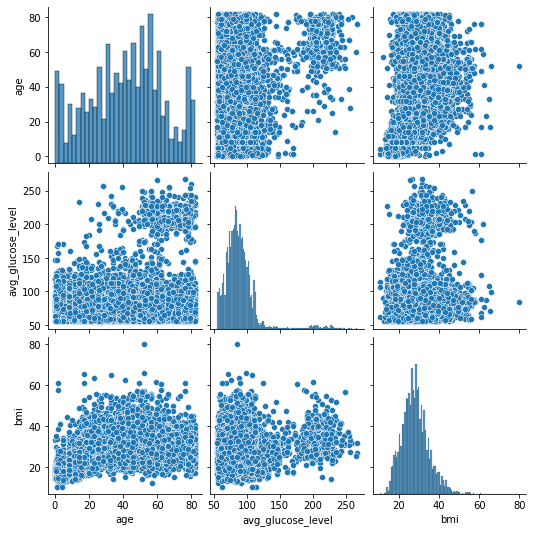

In [ ]:
sns.pairplot(data = data_train[fl_col])

Lets do log transformation on Glucose level


Link: 
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

The data is not really linear, i guess trees should work well for this data.

#### data_train_transform declaration

In [ ]:
data_train.avg_glucose_level.skew()

3.0372415072996914

In [ ]:
data_train_transform = data_train.copy()

In [ ]:
data_train_transform['avg_glucose_level'] = np.log(data_train['avg_glucose_level'])

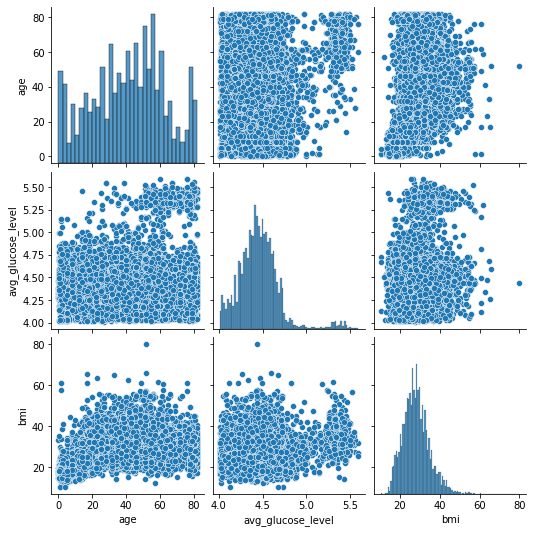

In [ ]:
sns.pairplot(data = data_train_transform[fl_col])

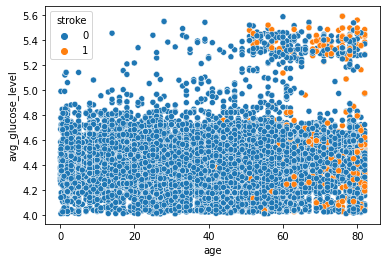

In [ ]:
sns.scatterplot(x = data_train_transform.age,y = data_train_transform.avg_glucose_level, hue=data_train_transform.stroke)

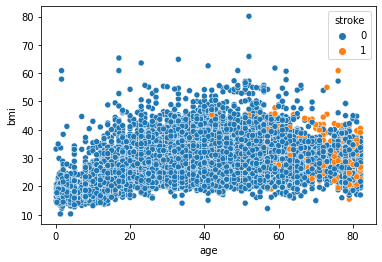

In [ ]:
sns.scatterplot(x = data_train_transform.age,y = data_train_transform.bmi, hue=data_train_transform.stroke)

We can see that many young people have High BMI but still are healthy, so there seems to be some correlation between the two.

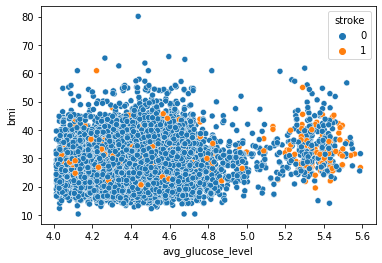

In [ ]:
sns.scatterplot(y = data_train_transform.bmi,x = data_train_transform.avg_glucose_level, hue=data_train_transform.stroke)

In [ ]:
data_train_transform.avg_glucose_level.skew()

1.3107791680422092

We have reduced the skew to a great extent


Last measure would be to use box-cox

In [ ]:
#sns.kdeplot( data = data_train_transform, x = avg_glucose_level, hue = 'stroke', multiple = 'stack'  )

###Categorical

In [ ]:
print(cat_col)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


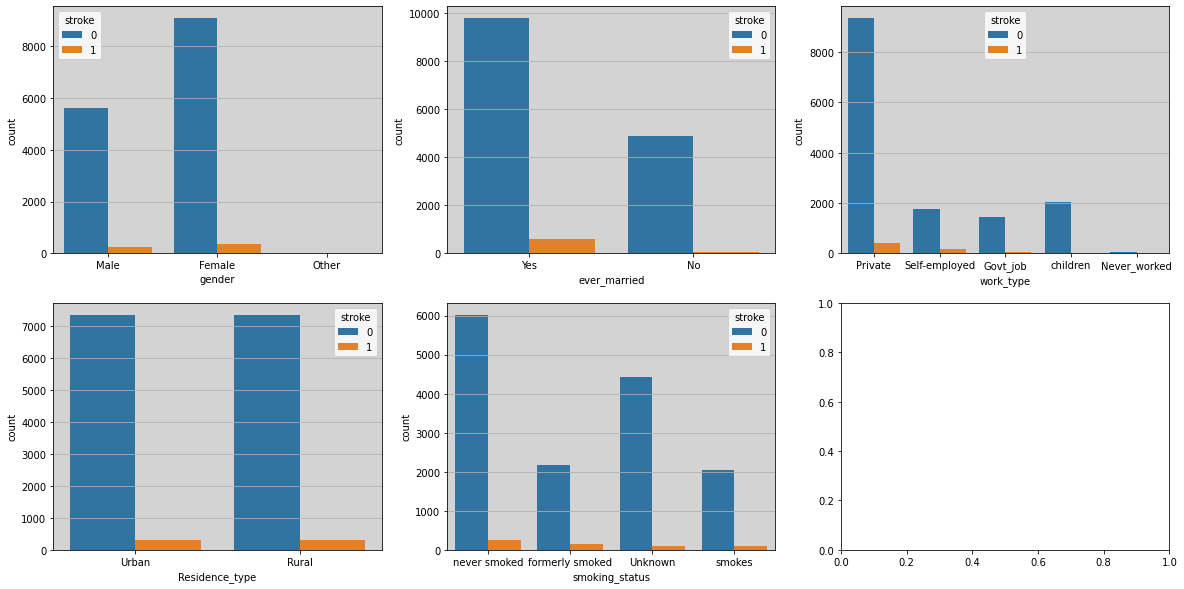

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize=(20,10))
ax = ax.flatten() # awesome trick, life saver types

for i,col in enumerate(cat_col):
  ax[i].grid(axis="both")
  ax[i].set_facecolor("lightgrey")
  sns.countplot( data = data_train_transform, x = col, hue = 'stroke',ax=ax[i] )


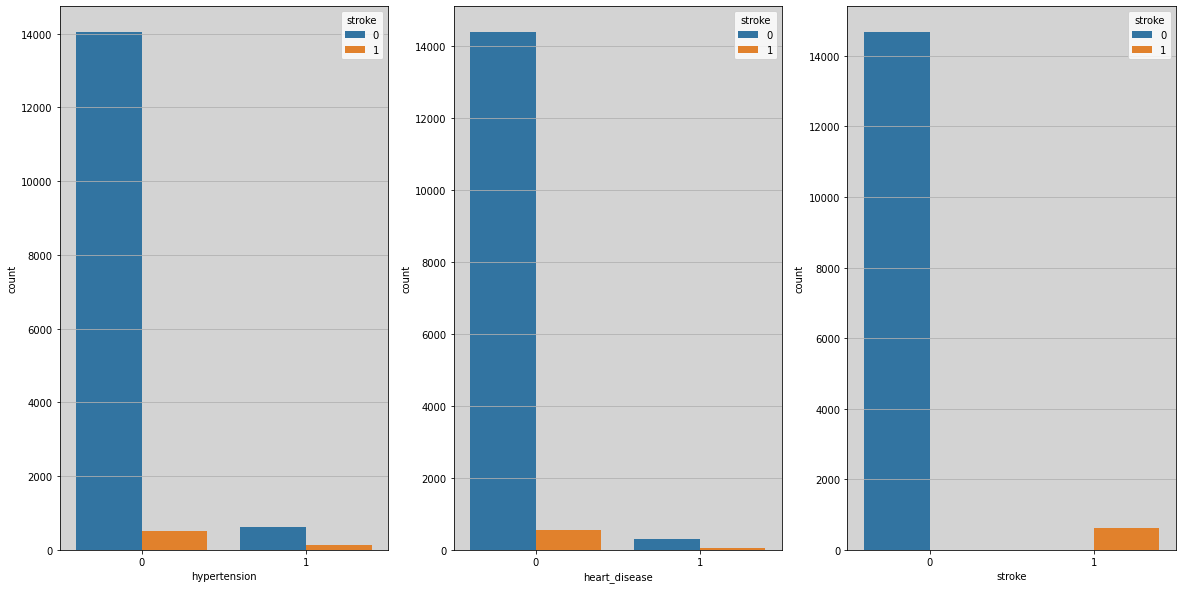

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize=(20,10))
ax = ax.flatten() # awesome trick, life saver types

for i,col in enumerate(num_col):
  ax[i].grid(axis="both")
  ax[i].set_facecolor("lightgrey")
  sns.countplot( data = data_train_transform, x = col, hue = 'stroke',ax=ax[i] )

In [ ]:
tot_cat_col = num_col + cat_col # joins both lists

In [ ]:
print(tot_cat_col)

['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


###Cramers V correlation test for categorical columns

In [ ]:
# the below code is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def compute_cramers_v_function(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def get_cramers_v_correlation(data_frame, categorical_columns=None):
    if categorical_columns is None:
        categorical_columns = data_frame.columns[data_frame.dtypes == "object"]
    
    cat_data_frame = data_frame[categorical_columns]
    
    rows = []
    for x in cat_data_frame:
        col = []
        for y in cat_data_frame :
            cramers = compute_cramers_v_function(cat_data_frame[x], cat_data_frame[y]) 
            col.append(round(cramers,2))
        rows.append(col)
        
    cramers_results = np.array(rows)
    cramers_v_correlation = pd.DataFrame(cramers_results, columns=cat_data_frame.columns, index=cat_data_frame.columns)
    
    return cramers_v_correlation

In [ ]:
cramers_corr_df = get_cramers_v_correlation(data_train_transform, categorical_columns=tot_cat_col)

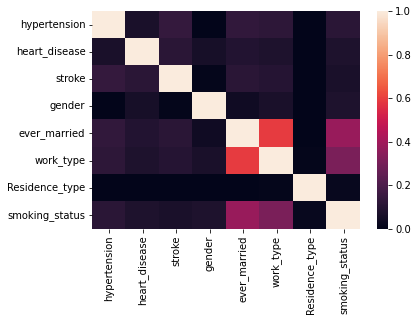

In [ ]:
sns.heatmap(cramers_corr_df)

I really need to set a new palette

In [ ]:
print(cramers_corr_df)

                hypertension  heart_disease  stroke  gender  ever_married  \
hypertension            1.00           0.07    0.14    0.00          0.13   
heart_disease           0.07           1.00    0.11    0.06          0.09   
stroke                  0.14           0.11    1.00    0.01          0.11   
gender                  0.00           0.06    0.01    1.00          0.04   
ever_married            0.13           0.09    0.11    0.04          1.00   
work_type               0.12           0.08    0.10    0.07          0.59   
Residence_type          0.00           0.00    0.00    0.00          0.00   
smoking_status          0.11           0.08    0.07    0.08          0.38   

                work_type  Residence_type  smoking_status  
hypertension         0.12            0.00            0.11  
heart_disease        0.08            0.00            0.08  
stroke               0.10            0.00            0.07  
gender               0.07            0.00            0.08  
ever_m

only feature above 0.5 is ever_marriend to work_type

###Duplicates 

In [ ]:
duplicates = data_train_transform[data_train_transform.duplicated()]

In [ ]:
print(duplicates)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Thankfully no duplicate

###Encoding


Lets encode every categorical column

For sklearn compose and column transform
https://www.youtube.com/watch?v=irHhDMbw3xo

In [ ]:
for i, col in enumerate(tot_cat_col):
  print(col , data_train_transform[col].unique())

hypertension [0 1]
heart_disease [0 1]
stroke [0 1]
gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


Need to use One hot Encoding on ['gender','work_type','Residence','smoking_status']


Link: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/


https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding
<br>

We can simply use .replace on ever-married and change it to 1 or 0

In [ ]:


train_predictors = data_train_transform[['gender','work_type','Residence_type','smoking_status']]
print(pd.get_dummies(train_predictors))

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
0                  0            1             0                   0   
1                  0            1             0                   0   
2                  1            0             0                   0   
3                  0            1             0                   0   
4                  1            0             0                   0   
...              ...          ...           ...                 ...   
15299              1            0             0                   1   
15300              1            0             0                   0   
15301              1            0             0                   0   
15302              0            1             0                   0   
15303              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                           0                  1                      

In [ ]:
data_train_tr_enc = pd.get_dummies(data_train_transform, columns = ['gender','work_type','Residence_type','smoking_status'] )

In [ ]:
data_train_tr_enc.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
data_train_tr_enc['ever_married'].replace('Yes',1,inplace = True)
data_train_tr_enc['ever_married'].replace('No',0,inplace = True)

In [ ]:
data_train_tr_enc['ever_married'].unique()

array([1, 0])

In [ ]:
data_train_tr_enc['ever_married'].dtype

dtype('int64')

####Scaling


Link: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(data_train_tr_enc[fl_col])
#print(scaler.fit(data_train_tr_enc[fl_col]))
sc_data_train = pd.DataFrame(scaler.fit_transform(data_train_tr_enc[fl_col]), columns = fl_col)



In [ ]:
sc_data_train.head(10)

,age,avg_glucose_level,bmi
0,-0.625710,-0.356375,0.444397
1,-0.392544,-0.415824,-0.626698
2,0.027154,0.757602,1.813018
3,0.680018,-1.234087,0.102242
4,-0.812243,-0.704254,0.102242
5,-0.345911,-0.102901,-0.879595
6,0.540119,0.126810,-0.418429
7,1.705948,-0.590671,-0.492811
8,0.167054,0.930577,0.890686
9,0.959817,-1.382029,-1.444895


In [ ]:
sc_data_train_enc = data_train_tr_enc.copy()

In [ ]:
for col in fl_col:
  sc_data_train_enc[col] = sc_data_train[col]

In [ ]:
sc_data_train_enc.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
sc_data_train_enc.head(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.625710,0,0,1,-0.356375,0.444397,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,-0.392544,0,0,1,-0.415824,-0.626698,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0.027154,0,0,1,0.757602,1.813018,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0.680018,0,0,1,-1.234087,0.102242,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,-0.812243,0,0,0,-0.704254,0.102242,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5,-0.345911,0,0,1,-0.102901,-0.879595,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
6,0.540119,0,0,1,0.126810,-0.418429,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,1.705948,0,1,1,-0.590671,-0.492811,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
8,0.167054,0,0,1,0.930577,0.890686,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
9,0.959817,0,0,1,-1.382029,-1.444895,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
data_train_tr_enc.head(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,1,4.376134,31.1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,33.0,0,0,1,4.362334,23.9,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,42.0,0,0,1,4.634729,40.3,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,56.0,0,0,1,4.172385,28.8,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,0,0,0,4.295379,28.8,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5,34.0,0,0,1,4.434975,22.2,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
6,53.0,0,0,1,4.488299,25.3,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,78.0,0,1,1,4.321746,24.8,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
8,45.0,0,0,1,4.674883,34.1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
9,62.0,0,0,1,4.138042,18.4,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


###Model 1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [76]:
all_features_x = ['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']

In [77]:
X = sc_data_train_enc[all_features_x ]
Y = sc_data_train_enc['stroke']

In [74]:
cv = StratifiedKFold(shuffle=True, random_state=2023)

oof_preds = pd.Series(0, index=data_train.index)
target = data_train['stroke']
tr_auc = []
vl_auc = []

for fold, (tr_ix, vl_ix) in enumerate(cv.split(X, Y)):
    X_tr, y_tr = X.iloc[tr_ix], Y.iloc[tr_ix]
    X_vl, y_vl = X.iloc[vl_ix], Y.iloc[vl_ix]
    
    model = LogisticRegression()


    print('_'*50)
    print(f'Fold {fold} ')
    
    model.fit(X_tr, y_tr)

    oof_preds.iloc[vl_ix] = model.predict_proba(X_vl)[:, 1]
    #print(oof_preds)
    tr_auc.append(roc_auc_score(y_tr, model.predict_proba(X_tr)[:, 1]))
    vl_auc.append(roc_auc_score(y_vl, model.predict_proba(X_vl)[:, 1]))
    

    print(f'Val AUC: {vl_auc[-1]}')

print()
print(f'Mean Val AUC: {np.mean(vl_auc)}')
print(f'OOF AUC:     {roc_auc_score(target, oof_preds)}')


    

__________________________________________________
Fold 0 
Val AUC: 0.8821611097590656
__________________________________________________
Fold 1 
Val AUC: 0.8786674238122278
__________________________________________________
Fold 2 
Val AUC: 0.8766108990977355
__________________________________________________
Fold 3 
Val AUC: 0.8754273813932768
__________________________________________________
Fold 4 
Val AUC: 0.9053083173737569

Mean Val AUC: 0.8836350262872126
OOF AUC:     0.8833287463937164


####Generating Test 

In [90]:
path_test = '/content/test.csv'
data_test = pd.read_csv(path_test)

In [91]:
all_features_xtest = ['age', 'avg_glucose_level', 'bmi',
    'gender', 'hypertension', 'heart_disease',
    'ever_married', 'work_type', 'Residence_type', 'smoking_status'
]

In [92]:
id = data_test['id']

In [94]:
preds = pd.Series(0, index=data_test.index)
X_test = data_test[all_features_xtest].copy()


X_test = data_test[all_features_xtest].copy()
#encoder, scaler, model = pipeline

X_test['avg_glucose_level'] = np.log(X_test['avg_glucose_level'])

#Encoding

X_test['ever_married'].replace('Yes',1,inplace = True)
X_test['ever_married'].replace('No',0,inplace = True)
X_test_enc = pd.get_dummies(X_test, columns = ['gender','work_type','Residence_type','smoking_status'] )

#print(X_test_enc.columns)

scaler = StandardScaler()
scaler.fit(X_test_enc[fl_col])
#print(scaler.fit(data_train_tr_enc[fl_col]))
X_test_sc = pd.DataFrame(scaler.fit_transform(X_test_enc[fl_col]), columns = fl_col)

X_test_sc_enc = X_test_enc.copy()
for col in fl_col:
  X_test_sc_enc[col] = X_test_sc[col]

preds += model.predict_proba(X_test_sc_enc)[:, 1]

submission = pd.DataFrame({
        "id": id,
        "stroke": preds,
    })
#submission.drop()

submission.to_csv('submission.csv',index=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [96]:
importance = model.coef_

In [97]:
print(importance)

[[ 1.96000926e+00  4.46283581e-01  1.31816348e-01 -1.00157833e-01
   2.11945775e-01  1.55292484e-01 -5.33248676e-02  6.27273131e-02
  -6.87391806e-04  1.14321204e-01 -3.79198962e-02  8.46640364e-02
  -3.09309453e-01  1.56959162e-01  5.42450496e-02 -4.55299959e-02
  -6.54369781e-02 -3.76273547e-02 -9.15566303e-02  2.03336017e-01]]


In [107]:
importance_df = pd.DataFrame(importance,columns=X_test_sc_enc.columns)

In [108]:
importance_df

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.960009,0.446284,0.131816,-0.100158,0.211946,0.155292,-0.053325,0.062727,-0.000687,0.114321,-0.03792,0.084664,-0.309309,0.156959,0.054245,-0.04553,-0.065437,-0.037627,-0.091557,0.203336


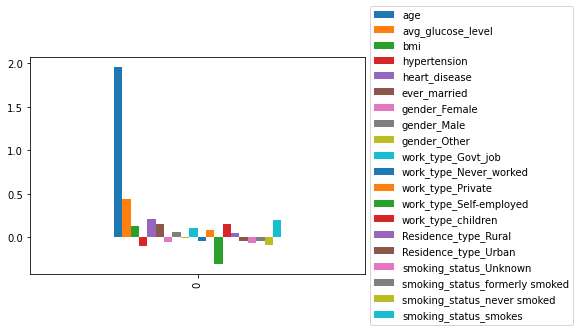

In [123]:
from matplotlib.legend import Legend
importance_df.plot(y = X_test_sc_enc.columns.tolist(),kind = 'bar').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


Observations:

We can see that the most importance is given to 
age, avg_glucose_level,bmi,heart_disease,ever_married,type 

*   age

*   avg_glucose_level

*   bmi

*   heart_disease
*   ever_married


*   type of job ( govt, pvt and chidren)


*   Smoking status


The three largest ones are:   


1.   age
2.   avg_glucose_level
1.   heart_diesease






Kaggle Score: 0.86731
Private score: 0.88653

As per results on Feb 11 2023
Leader Board Position:(If compared now to the results)
Public:  478 

Private: 536 